# Começando a pensar no projeto

BRAIN STORM

- **Histórico**, idade/pensionista, renda, score, primeiro valor de crédito, PMT (parcela máxima permitida), tempo de banco, histórico de crédito em aberto, se pagou quando pegou, se está devendo no cartão de crédito, investimento com o banco a fim de colocar como garantia, bens para garantia, valor de entrada

- recusar mais crédito

- classificar tipos de crédito, identificar se é melhor FP ou FN, 

- Objetivo é discriminar quem são os bons pagadores dos maus pagadores (Classificação - supervisionado)


## Contextualização

A PyCoders Ltda., cada vez mais especializada no mundo da Inteligência Artificial e Ciência de Dados, foi procurada por uma fintech para desenvolver um projeto de concessão de crédito para imóveis. Nesse projeto, espera-se a criação de valor que **discrimine ao máximo** os **bons pagadores** dos **maus pagadores**. 

Para isso, foi disponibilizada uma base de dados com milhares de casos de **empréstimos do passado** com diversas características dos clientes. 

Entrega: um modelo com a **melhor performance** possível.

Métrica de performance (inicialmente proposta): **ROC-AUC** (mas isso é flexível, conforme detalhado mais abaixo!)

## Base de Dados

Serão utilizadas bases de dados com **informações cadastrais, histórico de crédito e balanços financeiros de diversos clientes**. 

O conjunto de dados está dividido em **treino e teste**, todos no formato csv. 

Toda a modelagem, validação e avaliação deve ser feita em cima do conjunto de **treino**, que contém o target (arquivo: `application_train.csv`)

Há uma base já pronta, mas as demais bases auxiliares também serão disponibilizadas (sintam-se à vontade para explorá-las e utilizar as informações que julgarem relevantes!)

[Clique aqui](https://drive.google.com/file/d/17fyteuN2MdGdbP5_Xq_sySN_yH91vTup/view) pra baixar os dados (eles estão disponiveis no arquivo zipado `credito-imoveis.zip`).

## INICIANDO O PROJETO

**Carregando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
descricao = pd.read_csv('../Projeto/dataset/HomeCredit_columns_description.csv', encoding='latin1')

In [27]:
descricao[descricao['Table']=='application_{train|test}.csv']

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [31]:
print(descricao[(descricao['Table']=='application_{train|test}.csv')&(descricao['Row']=='TARGET')]['Description'][1])

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


In [18]:
df = pd.read_csv('application_train.csv')

In [19]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
246004,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246005,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,236776,1,Cash loans,M,Y,N,3,202500.0,204858.0,17653.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [35]:
df['CODE_GENDER'].value_counts(normalize=True, dropna=False)

F      0.657975
M      0.342013
XNA    0.000012
Name: CODE_GENDER, dtype: float64

In [34]:
df['TARGET'].value_counts(dropna=False)

0    226038
1     19970
Name: TARGET, dtype: int64

In [36]:
df['TARGET'].value_counts(dropna=False, normalize=True)

0    0.918824
1    0.081176
Name: TARGET, dtype: float64

In [38]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,246008.000000,246008.000000,246008.000000,2.460080e+05,2.460080e+05,245998.000000,2.457820e+05,246008.000000,246008.000000,246008.000000,...,246008.000000,246008.000000,246008.000000,246008.000000,212836.000000,212836.000000,212836.000000,212836.000000,212836.000000,212836.000000
mean,278280.072908,0.081176,0.415527,1.689122e+05,5.996283e+05,27129.162648,5.389289e+05,0.020882,-16042.794393,63963.755699,...,0.007975,0.000589,0.000508,0.000289,0.006291,0.006944,0.034487,0.267403,0.264109,1.900040
std,102790.909988,0.273106,0.719922,2.603818e+05,4.030672e+05,14504.965232,3.699738e+05,0.013852,4365.973763,141400.318322,...,0.088948,0.024271,0.022536,0.016986,0.083236,0.109538,0.204179,0.916640,0.611269,1.868217
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189165.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16561.125000,2.385000e+05,0.010006,-19691.000000,-2758.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278392.500000,0.000000,0.000000,1.485000e+05,5.147775e+05,24930.000000,4.500000e+05,0.018850,-15763.000000,-1215.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367272.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,34599.375000,6.795000e+05,0.028663,-12418.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,19.000000,23.000000


In [40]:
df.info(verbose=1, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    246008 non-null  int64  
 1    TARGET                        246008 non-null  int64  
 2    NAME_CONTRACT_TYPE            246008 non-null  object 
 3    CODE_GENDER                   246008 non-null  object 
 4    FLAG_OWN_CAR                  246008 non-null  object 
 5    FLAG_OWN_REALTY               246008 non-null  object 
 6    CNT_CHILDREN                  246008 non-null  int64  
 7    AMT_INCOME_TOTAL              246008 non-null  float64
 8    AMT_CREDIT                    246008 non-null  float64
 9    AMT_ANNUITY                   245998 non-null  float64
 10   AMT_GOODS_PRICE               245782 non-null  float64
 11   NAME_TYPE_SUITE               244960 non-null  object 
 12   NAME_INCOME_TYPE            

In [43]:
df.isna().sum().sort_values(ascending=False)

COMMONAREA_MEDI             171978
COMMONAREA_AVG              171978
COMMONAREA_MODE             171978
NONLIVINGAPARTMENTS_MODE    170914
NONLIVINGAPARTMENTS_AVG     170914
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [46]:
df.isna().sum().sort_values(ascending=False)/df.shape[0]*100

COMMONAREA_MEDI             69.907483
COMMONAREA_AVG              69.907483
COMMONAREA_MODE             69.907483
NONLIVINGAPARTMENTS_MODE    69.474976
NONLIVINGAPARTMENTS_AVG     69.474976
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

# ANÁLISE E EXPLORAÇÃO DOS DADOS

In [ ]:
# Análise inicial dos dados, como info, dados faltantes (para retirar), estudar as colunas, dados duplicados. SK_ID_CURR
# análises estatísticas, média, mediana, correlação,
# visualização dos dados


In [ ]:
# Particinar os dados (split train e test) -> train e validation

# Preprocessamento de dados -> FEATURE ENGINEERING

In [ ]:
# Preencher dados faltantes, transformar colunas categóricas em numéricas (ou dummies), retirar colunas com mais de n% dos dados faltantes
# Extração de dados, seleção de dados, balanceamento de classe!

# Criar novas colunas, por exemplo taxa (quantidade de pagamento)



In [48]:
df.corr().sort_values('TARGET') # dados numéricos

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
EXT_SOURCE_3,0.002684,-0.179246,-0.042886,-0.028683,0.043012,0.029117,0.047392,-0.007102,-0.204027,0.112342,...,-0.017289,-0.002265,-0.014922,-0.012592,-0.002373,-0.009843,-0.021793,-0.007124,-0.025224,-0.070242
EXT_SOURCE_2,0.001310,-0.160978,-0.017523,0.054826,0.131836,0.126699,0.139851,0.199326,-0.091906,-0.019764,...,0.001787,0.003890,0.003215,-0.006820,-0.004183,-0.000231,-0.000171,0.051359,-0.003711,-0.021358
EXT_SOURCE_1,0.001319,-0.158619,-0.140029,0.023339,0.168391,0.119544,0.175635,0.099948,-0.601492,0.289180,...,-0.029465,0.004585,-0.004208,-0.017924,-0.004723,-0.007274,-0.004628,0.032347,-0.006760,0.008499
DAYS_EMPLOYED,0.001836,-0.044862,-0.239866,-0.058849,-0.064905,-0.102962,-0.062846,-0.004443,-0.616375,1.000000,...,-0.040025,-0.010516,-0.010067,-0.007813,-0.005171,-0.001137,0.002307,-0.035900,0.020817,0.050895
FLOORSMAX_AVG,0.006101,-0.043720,-0.008682,0.054816,0.103929,0.130204,0.108795,0.322390,0.001114,-0.016487,...,0.009171,0.000258,-0.001772,-0.006246,0.003471,0.000859,0.001452,0.047402,-0.004367,-0.018679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAYS_LAST_PHONE_CHANGE,0.000739,0.054471,-0.006417,-0.016981,-0.074416,-0.063573,-0.077175,-0.044811,0.083575,0.022588,...,0.047923,0.006414,0.011176,0.007963,-0.000314,0.002001,-0.003071,-0.042034,-0.001761,-0.113823
REGION_RATING_CLIENT,0.001137,0.059170,0.023448,-0.078316,-0.101041,-0.128411,-0.102948,-0.533315,0.008758,0.032373,...,-0.010073,-0.001498,0.000882,-0.000328,0.005830,-0.000864,0.003224,-0.070274,0.007150,0.011730
REGION_RATING_CLIENT_W_CITY,0.000899,0.061518,0.022913,-0.083806,-0.110395,-0.141656,-0.111483,-0.532145,0.007877,0.034103,...,-0.011384,-0.001174,0.001112,-0.000103,0.005646,-0.000477,0.002576,-0.068635,0.006293,0.010569
DAYS_BIRTH,-0.002144,0.079414,0.332396,0.025419,-0.055686,0.009139,-0.053780,-0.029180,1.000000,-0.616375,...,0.045166,0.003374,0.010069,0.024602,0.006319,0.002327,0.000077,0.002281,-0.015807,-0.073086


In [49]:
df['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      43046
WEDNESDAY    41418
MONDAY       40709
THURSDAY     40616
FRIDAY       40202
SATURDAY     27083
SUNDAY       12934
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [51]:
df.groupby(['TARGET','WEEKDAY_APPR_PROCESS_START']).size() # dias de semana e final de semana

TARGET  WEEKDAY_APPR_PROCESS_START
0       FRIDAY                        36924
        MONDAY                        37521
        SATURDAY                      24937
        SUNDAY                        11896
        THURSDAY                      37346
        TUESDAY                       39439
        WEDNESDAY                     37975
1       FRIDAY                         3278
        MONDAY                         3188
        SATURDAY                       2146
        SUNDAY                         1038
        THURSDAY                       3270
        TUESDAY                        3607
        WEDNESDAY                      3443
dtype: int64

In [52]:
df["WEEKDAY_APPR_PROCESS_START"].apply(lambda x: "Weekend" if x in ["SATURDAY", "SUNDAY"] else "Working day")

0         Working day
1         Working day
2         Working day
3         Working day
4         Working day
             ...     
246003    Working day
246004        Weekend
246005        Weekend
246006        Weekend
246007    Working day
Name: WEEKDAY_APPR_PROCESS_START, Length: 246008, dtype: object

## PIPELINE

- remover tais colunas
- criar outras colunas
- imputer mean nas colunas numéricas
- encoding nas categóricas
- scaler

- balanceamento de classe

# Modelo

Usa o modelo dentro do pipeline

# Avaliar o modelo

In [73]:
def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)
    y_probs_train = estimator.predict_proba(X_train)[:, 1]

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))
    
    disp = RocCurveDisplay.from_predictions(y_train, y_probs_train)
    disp.ax_.set_title(f"AUC: {roc_auc_score(y_train, y_probs_train):.3f}", fontsize=16)
    x = np.linspace(0, 1, 100)
    plt.plot(x, x, ls=":", color="black")
    plt.show()

    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)
    y_probs_test = estimator.predict_proba(X_test)[:, 1]

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))
    
    disp = RocCurveDisplay.from_predictions(y_test, y_probs_test)
    disp.ax_.set_title(f"AUC: {roc_auc_score(y_test, y_probs_test):.3f}", fontsize=16)
    x = np.linspace(0, 1, 100)
    plt.plot(x, x, ls=":", color="black")
    plt.show()

In [56]:
df['']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
246004,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246005,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,236776,1,Cash loans,M,Y,N,3,202500.0,204858.0,17653.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# TENTA ESCOLHER 3 FEATURES COM O TARGET E RODA UM MODELO.
# VEJA O QUE ACONTECE



In [59]:
# particionar os dados -> test = validação
from sklearn.model_selection import  train_test_split


X = df[['FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE',
       'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH']] # são aleatórias só para exemplificar
y = df['TARGET']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
# PIPELINE -> TUDO QUE ACONTECE NO TREINO, ELE VAI REPLICAR PARA O TESTE. ELE ORGANIZA OS PASSOS
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier


#dados faltantes e normalização
pipe_features_num = Pipeline([('input_num',SimpleImputer(strategy='mean')), ('std', StandardScaler())]) # colocar os passos e os métodos do que iremos fazer com as features numéricas

#transformar as colunas
pre_process = ColumnTransformer([('transf_num', pipe_features_num, X_train.columns.tolist())]) # apliquei em todas as colunas


# Incluir o modelo no pipeline
pipe_rf = Pipeline([('pre_process', pre_process), ('rf', RandomForestClassifier(class_weight='balanced'))])

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['FLAG_DOCUMENT_3',
                                                   'REG_CITY_NOT_LIVE_CITY',
                                                   'FLAG_EMP_PHONE',
                                                   'REG_CITY_NOT_WORK_CITY',
                                                   'DAYS_ID_PUBLISH',
                                                   'DAYS_LAST_PHONE_CHANGE',
                                                   'REGION_RATING_CLIENT',
                                                   'REGION_RAT

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score


Métricas de avaliação de treino:


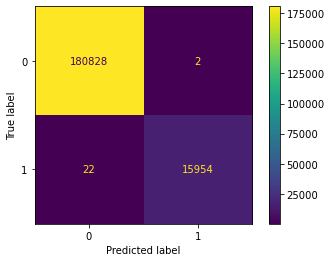

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    180830
           1       1.00      1.00      1.00     15976

    accuracy                           1.00    196806
   macro avg       1.00      1.00      1.00    196806
weighted avg       1.00      1.00      1.00    196806



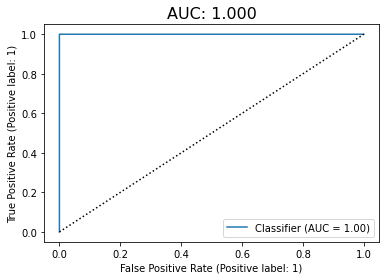


Métricas de avaliação de teste:


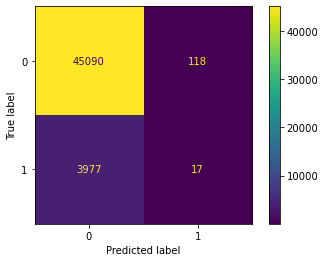

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     45208
           1       0.13      0.00      0.01      3994

    accuracy                           0.92     49202
   macro avg       0.52      0.50      0.48     49202
weighted avg       0.85      0.92      0.88     49202



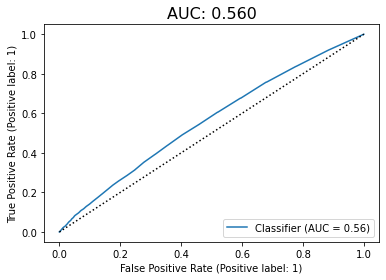

In [76]:
metricas_classificacao(pipe_rf, X_train, X_test, y_train, y_test)